In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Understanding the structure of data

In [41]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/aml project')  # ← Change to YOUR folder
print("Current directory:", os.getcwd())


# ===========================
# Load dataset from folder
# ===========================
import pandas as pd

data_path = "/content/drive/MyDrive/aml project/cleaned_dataset.csv"
df = pd.read_csv(data_path)

print("Loaded dataset with shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current directory: /content/drive/MyDrive/aml project
Loaded dataset with shape: (99492, 83)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,max_glu_serum_flag,A1Cresult_flag,diag_2_was_missing,diag_3_was_missing,readmitted_label,urgent_admit_flag,high_procedures_flag,short_stay_flag,discharge_instability_score,readmitted_30d
0,2278392,8222157,Caucasian,female,[0-10),Unknown,6,25,1,1,...,0,0,1,1,0,0,0,1,1,0
1,149190,55629189,Caucasian,female,[10-20),Unknown,1,1,7,3,...,0,0,0,0,1,0,0,1,1,0
2,64410,86047875,Africanamerican,female,[20-30),Unknown,1,1,7,2,...,0,0,0,0,0,0,1,1,2,0
3,500364,82442376,Caucasian,male,[30-40),Unknown,1,1,7,2,...,0,0,0,0,0,0,0,1,1,0
4,16680,42519267,Caucasian,male,[40-50),Unknown,1,1,7,1,...,0,0,0,0,0,0,0,1,1,0


In [42]:
# ===========================
# Global Color Palette Setup
# ===========================
import matplotlib.pyplot as plt
import matplotlib as mpl

canva_palette = [
    "#5170FF",   # vibrant blue-purple
    "#154594",   # dark saturated blue
    "#78E0F9",   # light aqua
    "#34788C",   # teal-blue
    "#69A5CC",   # blue-violet / purple-blue
    "#A7EBFB"    # very light cyan
]

# Use custom palette for all future plots
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=canva_palette)
mpl.rcParams['figure.facecolor'] = "white"
mpl.rcParams['axes.facecolor'] = "white"
mpl.rcParams['font.size'] = 12
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['grid.linestyle'] = "--"


In [43]:
# Column names
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'age_mapped', 'demo_key', 'pop_diabete3', 'pop_cvdinfr4', 'pop_cvdstrk3', 'pop_bphigh4', 'pop_toldhi2', 'pop_asthma3', 'pop_chccopd1', 'pop_havarth3', 'pop_addepev2', 'pop

In [44]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 99492 non-null  int64  
 1   patient_nbr                  99492 non-null  int64  
 2   race                         99492 non-null  object 
 3   gender                       99492 non-null  object 
 4   age                          99492 non-null  object 
 5   weight                       99492 non-null  object 
 6   admission_type_id            99492 non-null  int64  
 7   discharge_disposition_id     99492 non-null  int64  
 8   admission_source_id          99492 non-null  int64  
 9   time_in_hospital             99492 non-null  int64  
 10  payer_code                   99492 non-null  object 
 11  medical_specialty            99492 non-null  object 
 12  num_lab_procedures           99492 non-null  int64  
 13  num_procedures  

In [45]:
# Quick overview of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,99492.0,1.650268e+08,1.024029e+08,12522.000000,8.461616e+07,1.525927e+08,2.295414e+08,4.438672e+08
patient_nbr,99492.0,5.456367e+07,3.866453e+07,135.000000,2.346004e+07,4.598299e+07,8.779702e+07,1.895026e+08
admission_type_id,99492.0,2.027238e+00,1.450861e+00,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00
discharge_disposition_id,99492.0,3.740884e+00,5.309413e+00,1.000000,1.000000e+00,1.000000e+00,4.000000e+00,2.800000e+01
admission_source_id,99492.0,5.770997e+00,4.072906e+00,1.000000,1.000000e+00,7.000000e+00,7.000000e+00,2.500000e+01
time_in_hospital,99492.0,4.398454e+00,2.986972e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,1.400000e+01
num_lab_procedures,99492.0,4.307297e+01,1.969559e+01,1.000000,3.100000e+01,4.400000e+01,5.700000e+01,1.320000e+02
num_procedures,99492.0,1.340540e+00,1.703686e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
num_medications,99492.0,1.602654e+01,8.119809e+00,1.000000,1.000000e+01,1.500000e+01,2.000000e+01,8.100000e+01
number_outpatient,99492.0,3.733567e-01,1.276805e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01


In [46]:
# Quick overview of categorical (object) columns
df.describe(include=["object", "category"]).T

,count,unique,top,freq
race,99492,5,Caucasian,76099
gender,99492,2,female,53575
age,99492,10,[70-80),25468
weight,99492,10,Unknown,96433
payer_code,99492,17,Unknown,39711
medical_specialty,99492,73,Unknown,48766
diag_1,99473,714,428,6739
diag_2,99492,746,276,6638
diag_3,99492,787,250,11227
max_glu_serum,99492,4,Not tested,94202


# Missing Values & “Unknown” Values




2.1 True missing (NaN)

In [47]:
# Count missing values per column
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts

,0
diag_1,19
patient_nbr,0
encounter_id,0
race,0
gender,0
...,...
urgent_admit_flag,0
high_procedures_flag,0
short_stay_flag,0
discharge_instability_score,0


In [48]:
# Percentage of missing values
missing_percent = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
missing_percent

,0
diag_1,0.019097
patient_nbr,0.000000
encounter_id,0.000000
race,0.000000
gender,0.000000
...,...
urgent_admit_flag,0.000000
high_procedures_flag,0.000000
short_stay_flag,0.000000
discharge_instability_score,0.000000


2.2 “Unknown” as pseudo-missing

In [49]:
# Count 'Unknown' in each column (for object / category)
unknown_counts = (df.select_dtypes(include=["object"]) == "Unknown").sum().sort_values(ascending=False)
unknown_counts

,0
weight,96433
medical_specialty,48766
payer_code,39711
diag_3,1349
diag_2,336
race,0
age,0
gender,0
diag_1,0
max_glu_serum,0


# EDA

# Univariate Analysis: Categorical Features

In [50]:
categorical_cols = [
    "race",
    "gender",
    "age",
    "admission_type_id",
    "discharge_disposition_id",
    "admission_source_id"
]

for col in categorical_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False))
    print("\nPercentages:")
    print(df[col].value_counts(normalize=True, dropna=False) * 100)



=== race ===
race
Caucasian          76099
Africanamerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

Percentages:
race
Caucasian          76.487557
Africanamerican    19.308085
Hispanic            2.047401
Other               1.512684
Asian               0.644273
Name: proportion, dtype: float64

=== gender ===
gender
female    53575
male      45917
Name: count, dtype: int64

Percentages:
gender
female    53.848551
male      46.151449
Name: proportion, dtype: float64

=== age ===
age
[70-80)     25468
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: count, dtype: int64

Percentages:
age
[70-80)     25.598038
[60-70)     22.100269
[50-60)     16.981265
[80-90)     16.885780
[40-50)      9.513328
[30-40)      3.717887
[90-100)     2.737909
[20-30)      1.619226
[10-20)      0.685482
[0-10)       0.1608

# Univariate Analysis: Numerical Features

In [51]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols


['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'diabetesMed',
 'pop_diabete3',
 'pop_cvdinfr4',
 'pop_cvdstrk3',
 'pop_bphigh4',
 'pop_toldhi2',
 'pop_asthma3',
 'pop_chccopd1',
 'pop_havarth3',
 'pop_addepev2',
 'pop_chckidny',
 'pop_smoke100',
 'pop_exerany2',
 'pop_hlthpln1',
 'pop_medcost',
 'pop_checkup1',
 'pop_income2',
 'pop_educa',
 'pop_employ1',
 'pop_genhlth',
 'pop_physhlth',
 'pop_menthlth',
 'max_glu_serum_flag',
 'A1Cresult_flag',
 'diag_2_was_missing',
 'diag_3_was_missing',
 'readmitted_label',
 'urgent_admit_flag',
 'high_procedures_flag',
 'short_stay_flag',
 'discharge_instability_score',
 'readmitted_30d']

In [52]:
# Summary statistics
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
encounter_id,99492.0,1.650268e+08,1.024029e+08,12522.000000,8.461616e+07,1.525927e+08,2.295414e+08,4.438672e+08
patient_nbr,99492.0,5.456367e+07,3.866453e+07,135.000000,2.346004e+07,4.598299e+07,8.779702e+07,1.895026e+08
admission_type_id,99492.0,2.027238e+00,1.450861e+00,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00
discharge_disposition_id,99492.0,3.740884e+00,5.309413e+00,1.000000,1.000000e+00,1.000000e+00,4.000000e+00,2.800000e+01
admission_source_id,99492.0,5.770997e+00,4.072906e+00,1.000000,1.000000e+00,7.000000e+00,7.000000e+00,2.500000e+01
time_in_hospital,99492.0,4.398454e+00,2.986972e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,1.400000e+01
num_lab_procedures,99492.0,4.307297e+01,1.969559e+01,1.000000,3.100000e+01,4.400000e+01,5.700000e+01,1.320000e+02
num_procedures,99492.0,1.340540e+00,1.703686e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
num_medications,99492.0,1.602654e+01,8.119809e+00,1.000000,1.000000e+01,1.500000e+01,2.000000e+01,8.100000e+01
number_outpatient,99492.0,3.733567e-01,1.276805e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01


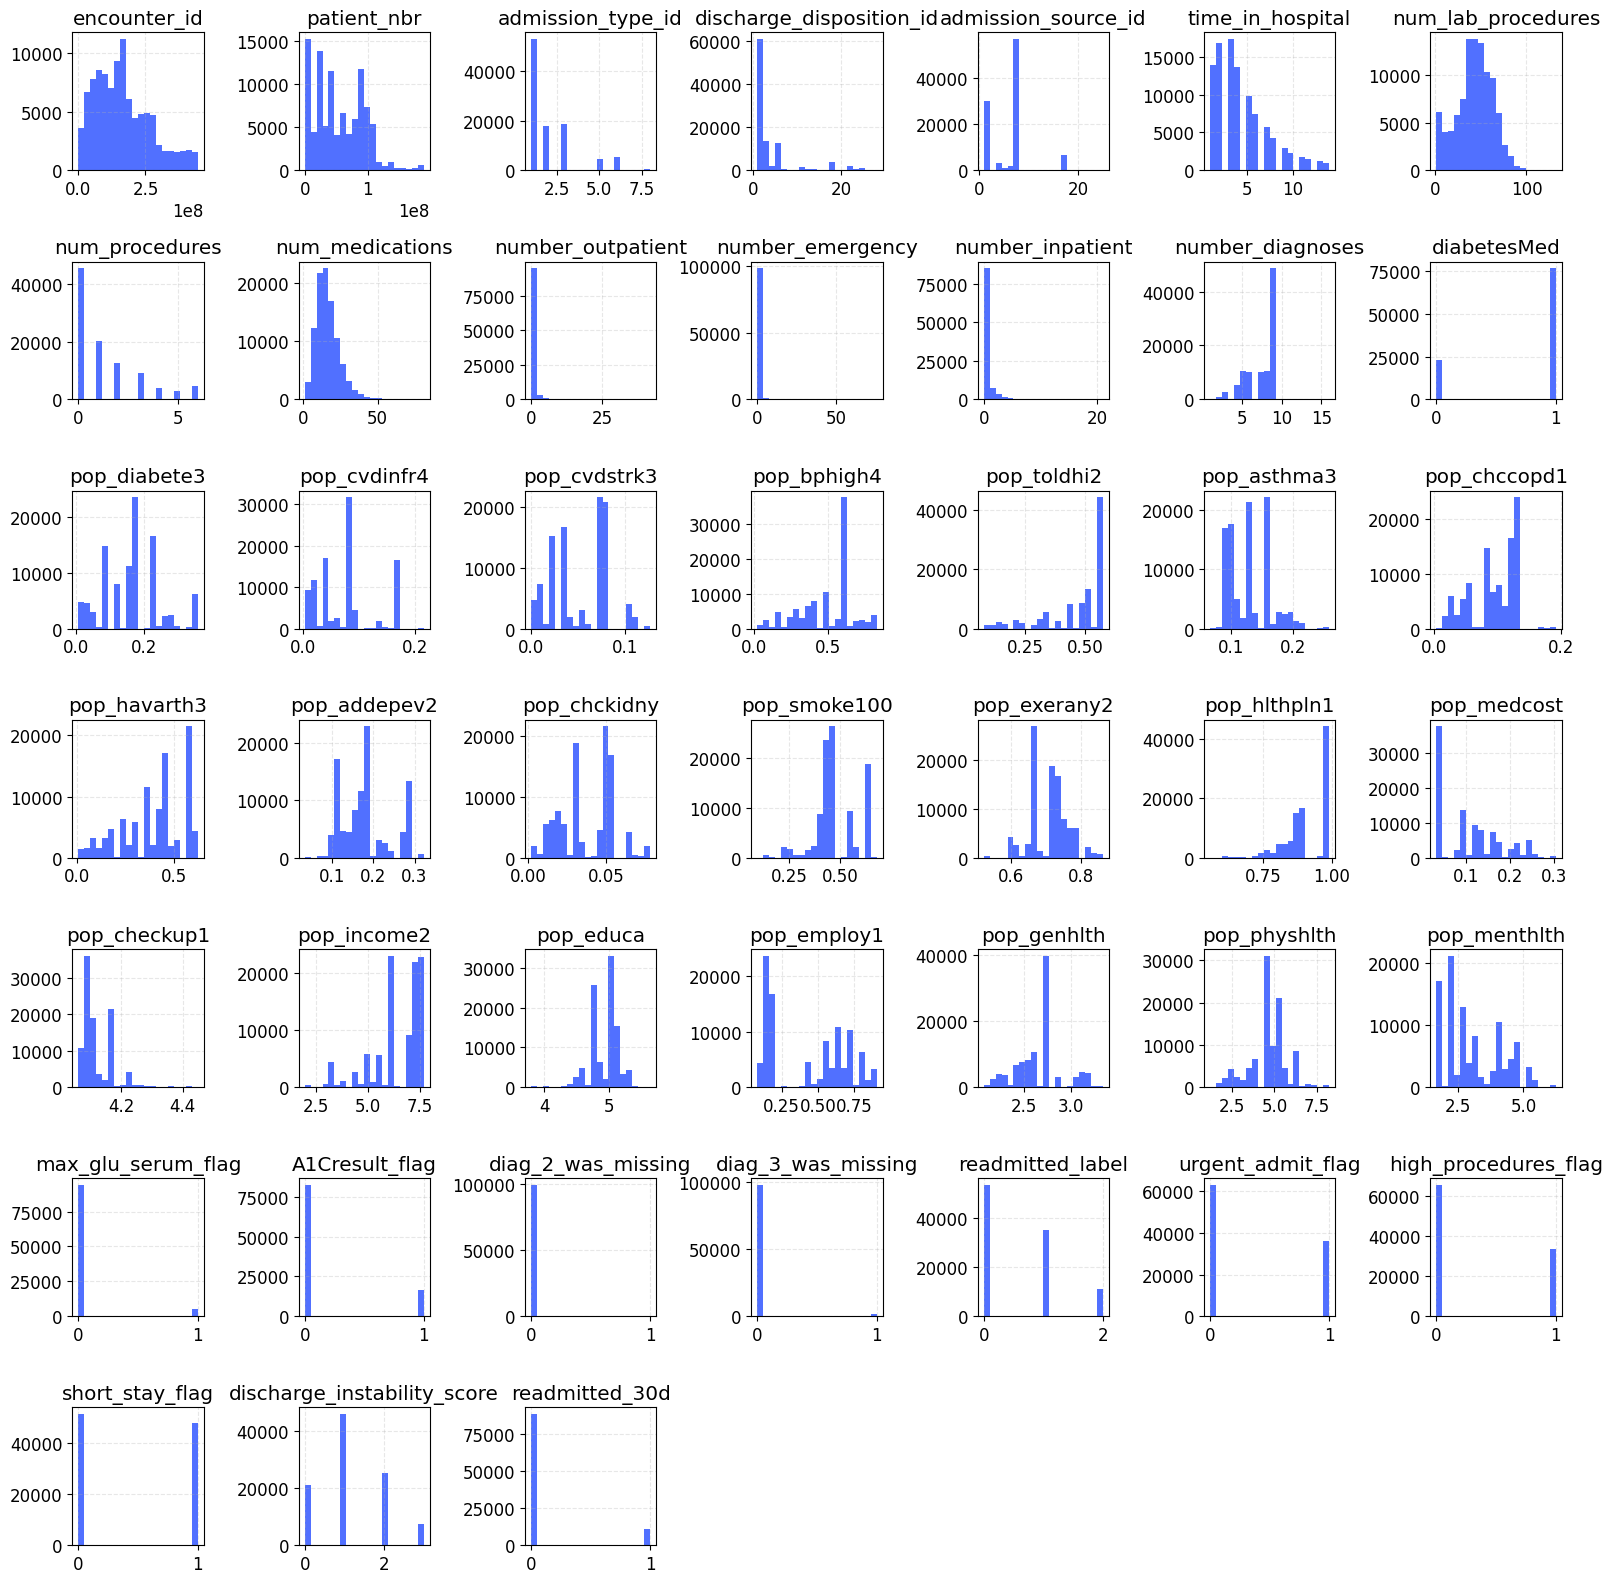

In [53]:


df[numeric_cols].hist(figsize=(16, 16), bins=20)
plt.tight_layout()
plt.show()


# Target Variable: readmitted_30d

In [54]:
# Distribution of the target
df["readmitted_30d"].value_counts()


,count
readmitted_30d,
0,88323
1,11169


In [55]:
# Percentage distribution
df["readmitted_30d"].value_counts(normalize=True) * 100


,proportion
readmitted_30d,
0,88.773972
1,11.226028


# Categorical Features vs Target

In [56]:
target = "readmitted_30d"

for col in categorical_cols:
    print(f"\n==== {col} vs {target} ====")
    ctab = pd.crosstab(df[col], df[target])
    print("Counts:\n", ctab)

    print("\nRow-wise percentages (probability of readmission within each category):")
    ctab_norm = pd.crosstab(df[col], df[target], normalize="index") * 100
    print(ctab_norm.round(2))



==== race vs readmitted_30d ====
Counts:
 readmitted_30d       0     1
race                        
Africanamerican  17055  2155
Asian              576    65
Caucasian        67507  8592
Hispanic          1825   212
Other             1360   145

Row-wise percentages (probability of readmission within each category):
readmitted_30d       0      1
race                         
Africanamerican  88.78  11.22
Asian            89.86  10.14
Caucasian        88.71  11.29
Hispanic         89.59  10.41
Other            90.37   9.63

==== gender vs readmitted_30d ====
Counts:
 readmitted_30d      0     1
gender                     
female          47514  6061
male            40809  5108

Row-wise percentages (probability of readmission within each category):
readmitted_30d      0      1
gender                      
female          88.69  11.31
male            88.88  11.12

==== age vs readmitted_30d ====
Counts:
 readmitted_30d      0     1
age                        
[0-10)            157     3

# Numerical Features vs Target

In [57]:
group_means = df.groupby(target)[numeric_cols].mean().T
group_means

readmitted_30d,0,1
encounter_id,1.653199e+08,1.627091e+08
patient_nbr,5.444680e+07,5.548786e+07
admission_type_id,2.033276e+00,1.979497e+00
discharge_disposition_id,3.645291e+00,4.496822e+00
admission_source_id,5.763504e+00,5.830244e+00
time_in_hospital,4.351347e+00,4.770973e+00
num_lab_procedures,4.292952e+01,4.420736e+01
num_procedures,1.347610e+00,1.284627e+00
num_medications,1.591256e+01,1.692793e+01
number_outpatient,3.647974e-01,4.410422e-01


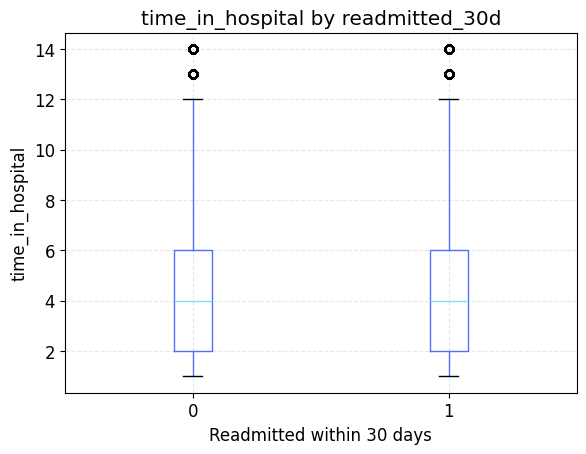

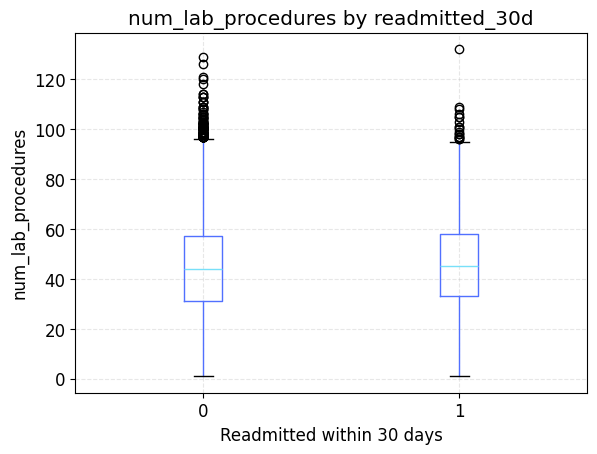

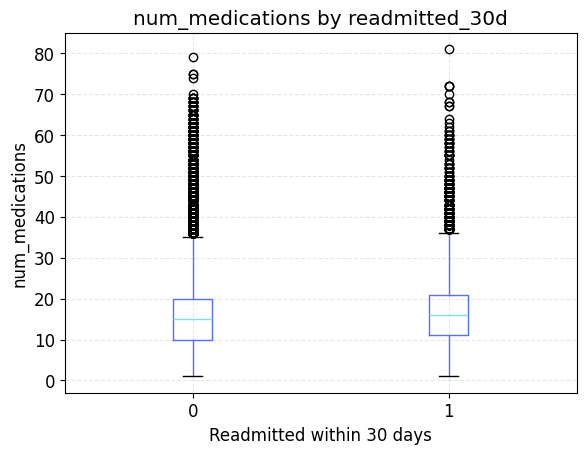

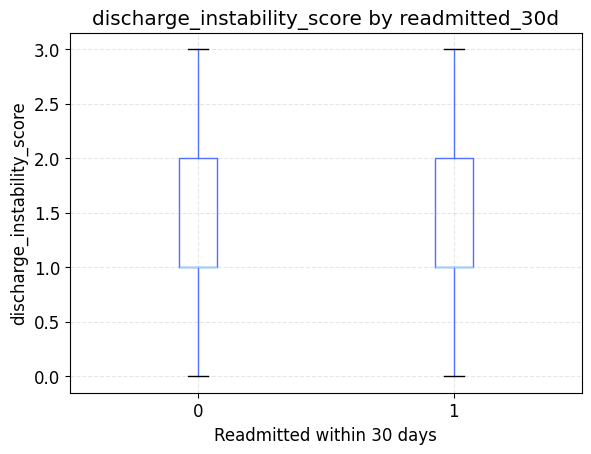

In [58]:
import matplotlib.pyplot as plt

important_numeric = ["time_in_hospital", "num_lab_procedures", "num_medications", "discharge_instability_score"]

for col in important_numeric:
    df.boxplot(column=col, by=target)
    plt.title(f"{col} by {target}")
    plt.suptitle("")  # remove automatic title
    plt.xlabel("Readmitted within 30 days")
    plt.ylabel(col)
    plt.show()


# Correlation Matrix (Numeric Features)

In [59]:
corr_matrix = df[numeric_cols].corr()

# Correlation with the target
corr_with_target = corr_matrix[target].sort_values(ascending=False)
corr_with_target


,readmitted_30d
readmitted_30d,1.000000
readmitted_label,0.739475
number_inpatient,0.165538
number_emergency,0.060875
discharge_disposition_id,0.050630
number_diagnoses,0.049625
time_in_hospital,0.044350
num_medications,0.039476
diabetesMed,0.027497
num_lab_procedures,0.020482


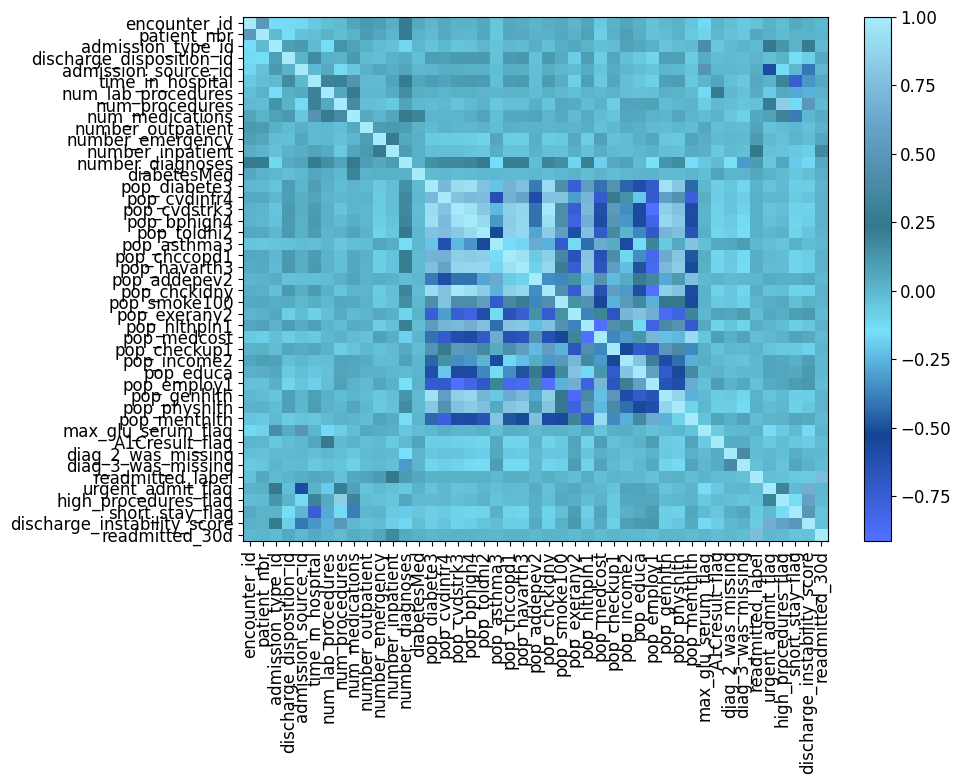

In [60]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Build continuous colormap from your Canva palette
canva_palette = [
    "#5170FF",   # vibrant blue-purple
    "#154594",   # dark saturated blue
    "#78E0F9",   # light aqua
    "#34788C",   # teal-blue
    "#69A5CC",   # blue-violet / purple-blue
    "#A7EBFB"    # very light cyan
]

# Linear colormap
canva_cmap = mcolors.LinearSegmentedColormap.from_list("canva_cmap", canva_palette)

plt.figure(figsize=(10, 8))

im = plt.imshow(corr_matrix, cmap=canva_cmap, aspect='auto')
plt.colorbar(im)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

plt.tight_layout()
plt.show()


readmitted_30d                 1.000000
readmitted_label               0.739475
number_inpatient               0.165538
number_emergency               0.060875
discharge_disposition_id       0.050630
number_diagnoses               0.049625
short_stay_flag                0.044678
time_in_hospital               0.044350
num_medications                0.039476
discharge_instability_score    0.037191
diabetesMed                    0.027497
pop_employ1                    0.021075
num_lab_procedures             0.020482
number_outpatient              0.018851
A1Cresult_flag                 0.018197
Name: readmitted_30d, dtype: float64
Selected features: ['readmitted_30d', 'readmitted_label', 'number_inpatient', 'number_emergency', 'discharge_disposition_id']


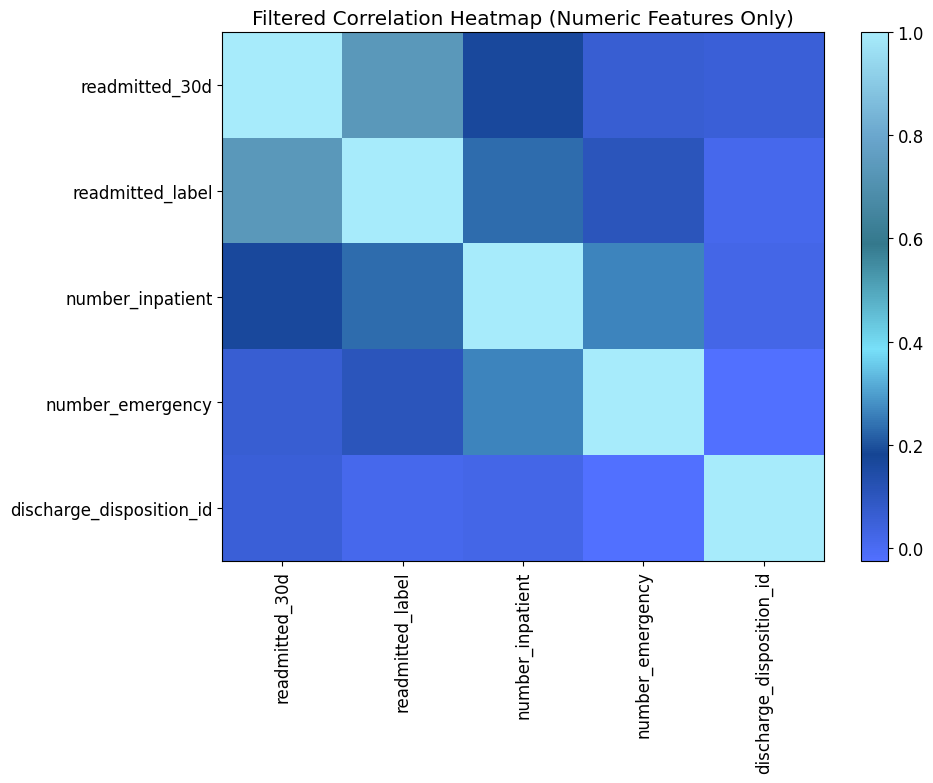

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

target = "readmitted_30d"

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation with target
corr = numeric_df.corr()[target].abs().sort_values(ascending=False)

print(corr.head(15))  # optional preview

# Select features above threshold
threshold = 0.05
strong_features = corr[corr > threshold].index.tolist()

print("Selected features:", strong_features)

# Correlation matrix for these features
corr_subset = numeric_df[strong_features].corr()

# Build your custom colormap
canva_palette = ["#5170FF", "#154594", "#78E0F9", "#34788C", "#69A5CC", "#A7EBFB"]
canva_cmap = mcolors.LinearSegmentedColormap.from_list("canva_cmap", canva_palette)

# Heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_subset, cmap=canva_cmap, aspect='auto')
plt.colorbar(im)

plt.xticks(range(len(corr_subset.columns)), corr_subset.columns, rotation=90)
plt.yticks(range(len(corr_subset.index)), corr_subset.index)

plt.title("Filtered Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()


In [62]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_mi = df.copy()

# Encode categorical columns for MI
for col in df_mi.select_dtypes(include=['object']).columns:
    df_mi[col] = LabelEncoder().fit_transform(df_mi[col].astype(str))

X = df_mi.drop(columns=[target])
y = df_mi[target]

mi_scores = mutual_info_classif(X, y, discrete_features='auto')

mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_series.head(20))


readmitted                  0.361765
readmitted_label            0.355829
acarbose                    0.022804
glimepiride                 0.020028
diabetesMed                 0.018634
glyburide-metformin         0.017973
miglitol                    0.017515
nateglinide                 0.017432
max_glu_serum               0.015901
race                        0.015367
repaglinide                 0.014739
short_stay_flag             0.014381
glipizide                   0.013049
glyburide                   0.012730
chlorpropamide              0.012721
gender                      0.012390
metformin                   0.012253
discharge_disposition_id    0.011519
pioglitazone                0.011281
number_inpatient            0.011243
dtype: float64


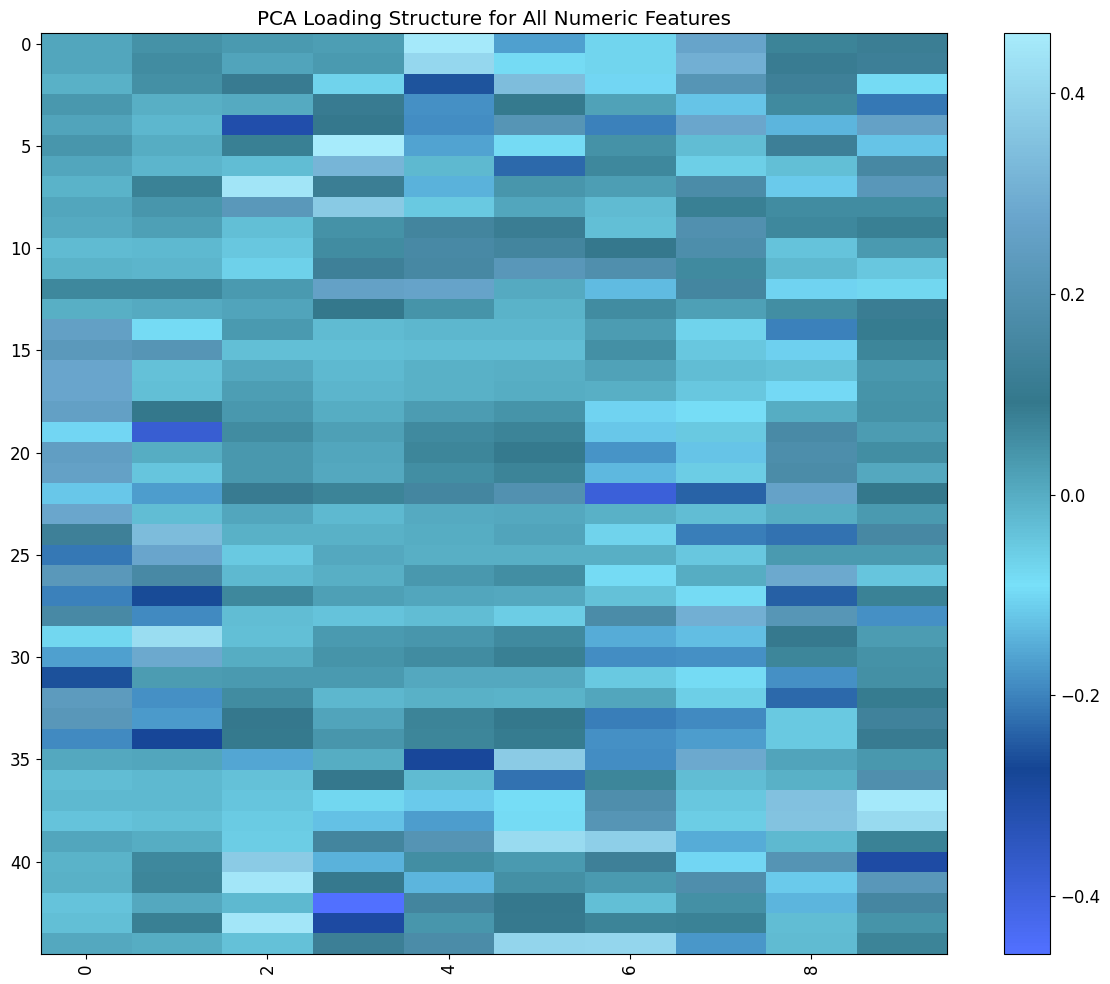

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_num = df.select_dtypes(include=['number'])
X_scaled = StandardScaler().fit_transform(X_num)

pca = PCA(n_components=10)
pca.fit(X_scaled)

loadings = pd.DataFrame(pca.components_.T,
                        index=X_num.columns,
                        columns=[f'PC{i}' for i in range(1, 11)])

plt.figure(figsize=(12,10))
plt.imshow(loadings, aspect='auto', cmap=canva_cmap)
plt.colorbar()
plt.xticks(rotation=90)
plt.title("PCA Loading Structure for All Numeric Features")
plt.tight_layout()
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(25)

print(top_features)


readmitted_label               0.478253
readmitted                     0.469738
number_inpatient               0.011641
discharge_disposition_id       0.004270
diag_1                         0.002169
number_emergency               0.002120
encounter_id                   0.002116
patient_nbr                    0.002069
num_medications                0.002004
num_lab_procedures             0.001772
diag_2                         0.001717
diag_3                         0.001690
number_diagnoses               0.001648
time_in_hospital               0.001645
medical_specialty              0.000900
short_stay_flag                0.000787
payer_code                     0.000764
insulin                        0.000695
number_outpatient              0.000668
num_procedures                 0.000647
discharge_instability_score    0.000571
admission_type_id              0.000487
admission_source_id            0.000435
diabetesMed                    0.000427
age                            0.000402


# Bivariant Analysis

In [65]:
#Top 5 correlaten
top_numeric = corr_with_target.index[1:6].tolist()
top_numeric

['readmitted_label',
 'number_inpatient',
 'number_emergency',
 'discharge_disposition_id',
 'number_diagnoses']

<Figure size 600x400 with 0 Axes>

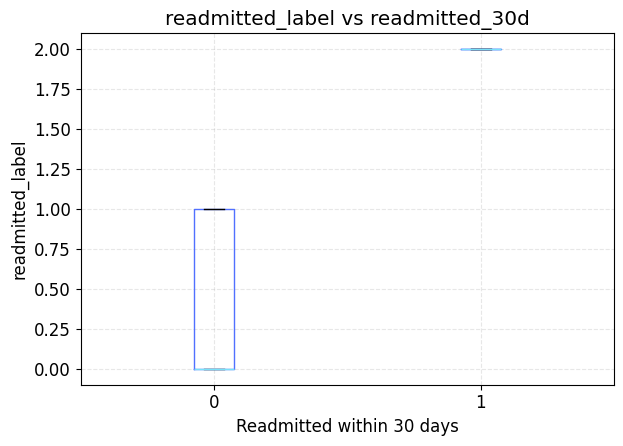

<Figure size 600x400 with 0 Axes>

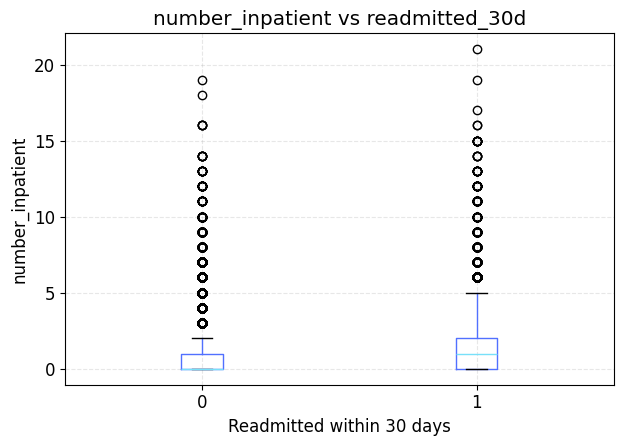

<Figure size 600x400 with 0 Axes>

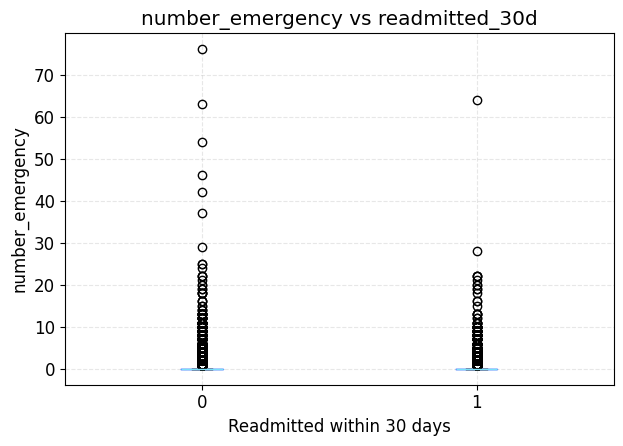

<Figure size 600x400 with 0 Axes>

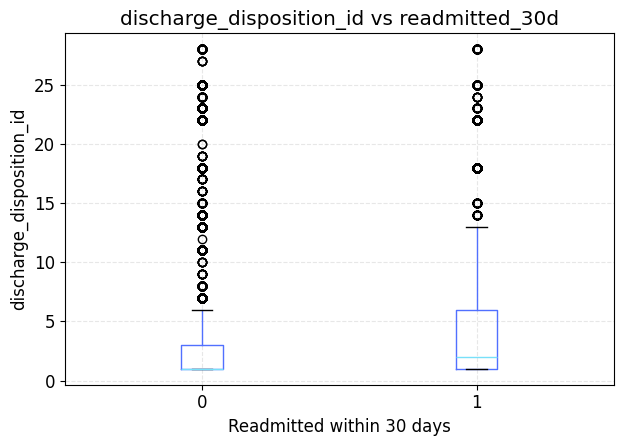

<Figure size 600x400 with 0 Axes>

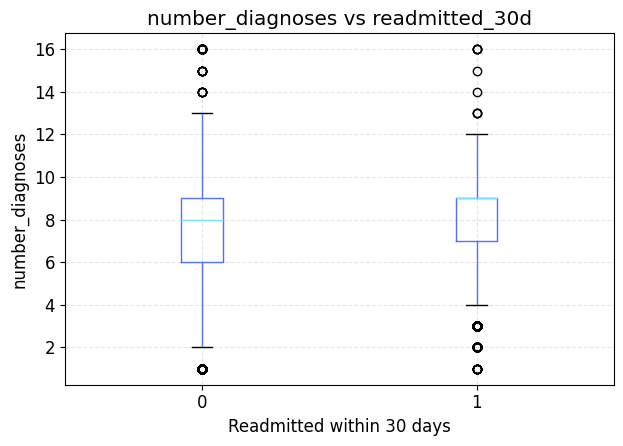

In [66]:
for col in top_numeric:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col, by=target)
    plt.title(f"{col} vs {target}")
    plt.xlabel("Readmitted within 30 days")
    plt.ylabel(col)
    plt.suptitle("")  # remove default boxplot title
    plt.tight_layout()
    plt.show()

In [67]:
strong_cat_features = ["race", "gender", "age", "admission_type_id"]
strong_cat_features = [c for c in strong_cat_features if c in df.columns]


<Figure size 700x400 with 0 Axes>

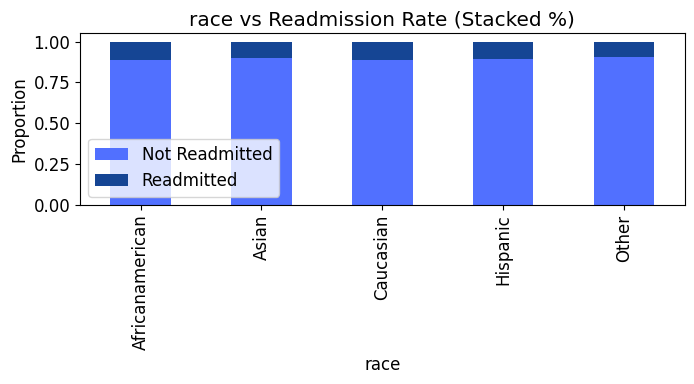

<Figure size 700x400 with 0 Axes>

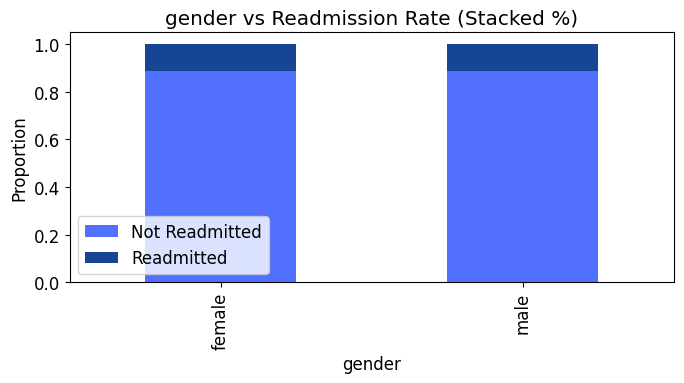

<Figure size 700x400 with 0 Axes>

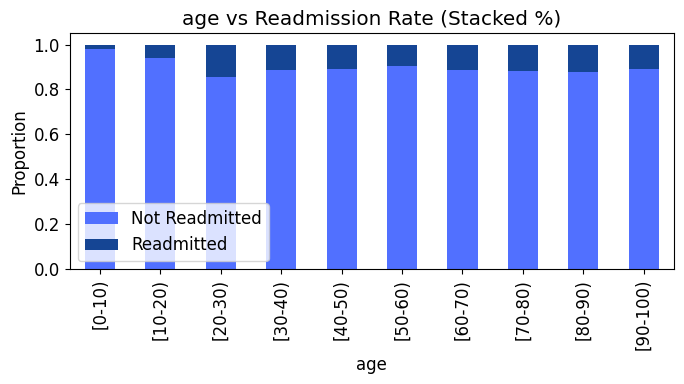

<Figure size 700x400 with 0 Axes>

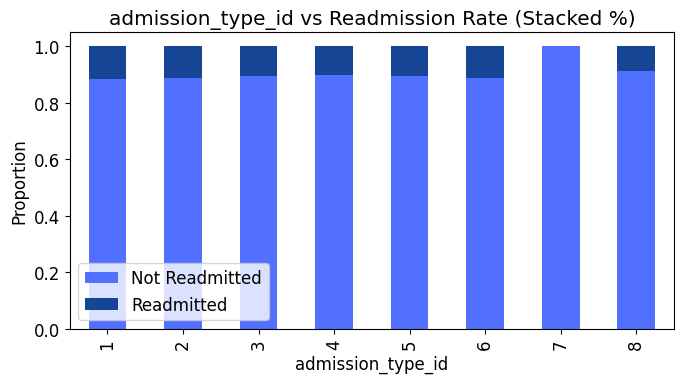

In [68]:
for col in strong_cat_features:
    plt.figure(figsize=(7,4))

    ctab = pd.crosstab(df[col], df[target], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(7,4))

    plt.title(f"{col} vs Readmission Rate (Stacked %)")
    plt.ylabel("Proportion")
    plt.legend(["Not Readmitted", "Readmitted"])
    plt.tight_layout()
    plt.show()


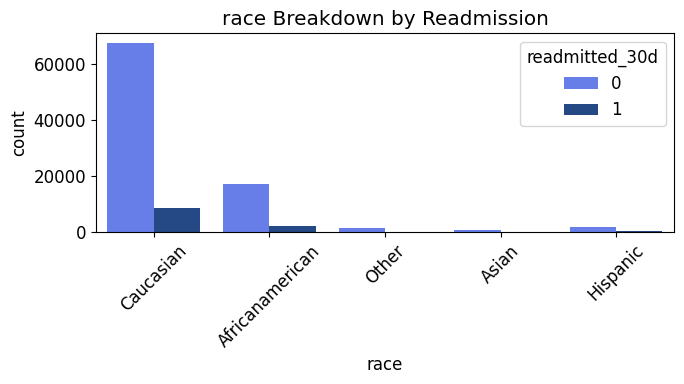

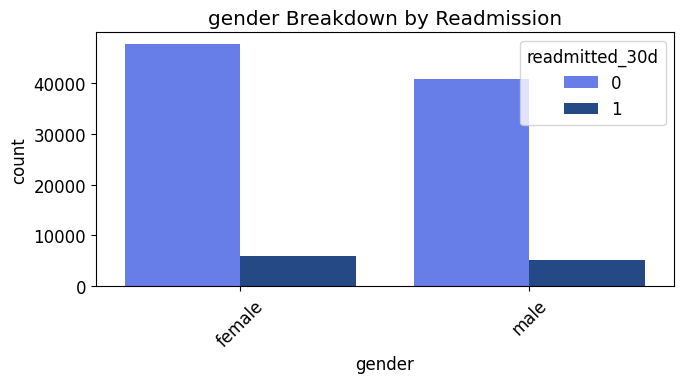

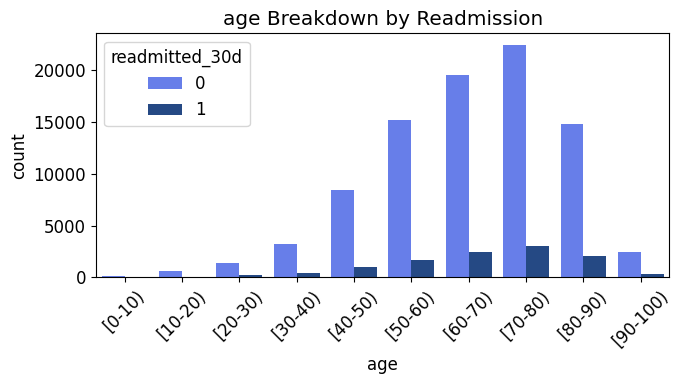

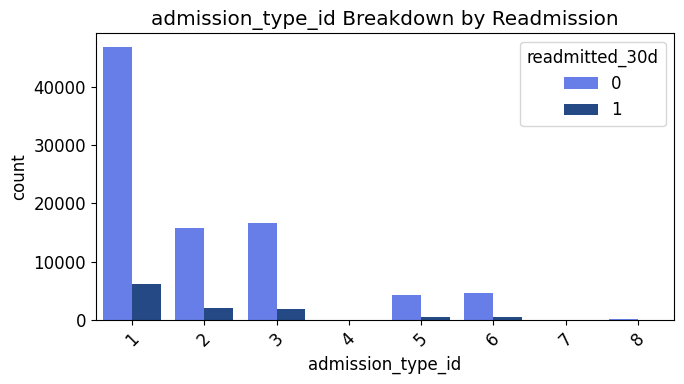

In [69]:
import seaborn as sns

for col in strong_cat_features:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col} Breakdown by Readmission")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# OUtlier Check

In [70]:
check_cols = ["time_in_hospital", "num_lab_procedures", "num_medications"]

for col in check_cols:
    print(f"\n=== {col} ===")
    print(df[col].describe())

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Number of outliers (IQR method): {len(outliers)}")



=== time_in_hospital ===
count    99492.000000
mean         4.398454
std          2.986972
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64
Number of outliers (IQR method): 2207

=== num_lab_procedures ===
count    99492.000000
mean        43.072971
std         19.695587
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64
Number of outliers (IQR method): 142

=== num_medications ===
count    99492.000000
mean        16.026545
std          8.119809
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64
Number of outliers (IQR method): 2482


# Feture Engineering

In [71]:
# Total prior visits
df["total_prior_visits"] = df["number_outpatient"] + df["number_emergency"] + df["number_inpatient"]

# Intensity features
df["lab_per_day"] = df["num_lab_procedures"] / df["time_in_hospital"].replace(0, np.nan)
df["meds_per_day"] = df["num_medications"] / df["time_in_hospital"].replace(0, np.nan)

df[["total_prior_visits", "lab_per_day", "meds_per_day"]].describe().T


,count,mean,std,min,25%,50%,75%,max
total_prior_visits,99492.0,1.217806,2.308690,0.000000,0.0,0.000000,2.000000,80.0
lab_per_day,99492.0,14.367320,12.060306,0.071429,6.5,10.857143,18.333333,111.0
meds_per_day,99492.0,5.074394,3.825646,0.083333,2.6,4.000000,6.200000,42.0


In [72]:
df.groupby("readmitted_30d")[["total_prior_visits", "lab_per_day", "meds_per_day"]].mean()


,total_prior_visits,lab_per_day,meds_per_day
readmitted_30d,,,
0,1.114059,14.509399,5.107510
1,2.038231,13.243778,4.812519
